Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into python environment

In [2]:
data=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\titanic_dataset.xlsx")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Making ‘PassengerId’ as the index column

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Check the basic details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.0,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",male,NaN,NaN,NaN,347082.0,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().values.any()

True

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.isnull().sum().sum()

866

In [11]:
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

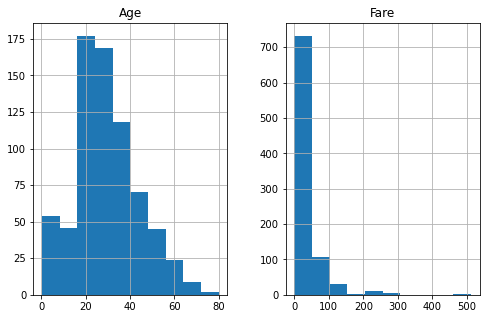

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,5))
plt.show()

In [13]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fill in all the missing values present in all the columns in the dataset

In [14]:
#There are missing values only in three columns ie.Age,Cabin and Embarked

In [15]:
#Filling missing values in age column

In [16]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Filling missing values in 'Embarked column'

In [18]:
data['Embarked'].mode

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [19]:

data['Embarked'].fillna(('S'),inplace=True)

In [20]:
#Filling the missing values in 'Cabin' column

In [21]:
data['Cabin'].fillna(('Unknown'),inplace=True)


In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
data.isnull().values.any()

False

# Check and handle outliers in at least 3 columns in the dataset

In [51]:
data=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\titanic_dataset.xlsx")


In [25]:
#finding the percentage of missing values in all columns

In [26]:
missing_values=data.isnull().sum()
missing_values[missing_values>0]/len(data)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [27]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
data['Age']=data['Age'].fillna(data['Age'].mean(),inplace=True)

data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [29]:
#finding out outliers in respect of the variable 'Fare'

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


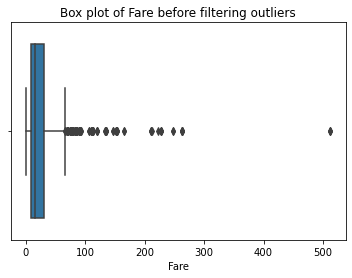

In [30]:
# Box Plot
import seaborn as sns
sns.boxplot(data['Fare'],data=data)
plt.title('Box plot of Fare before filtering outliers');


In [31]:
print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Fare:  4.787316519674893


In [32]:
#the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

In [33]:
Q1=data['Fare'].quantile(0.25)
Q3=data['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [34]:

whisker_width = 1.5
Fare_outliers = data[(data['Fare'] < Q1 - whisker_width*IQR) | (data['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,None,1,0,71.2833,C
27,0,1,male,None,3,2,263.0000,S
31,1,1,female,None,1,0,146.5208,C
34,0,1,male,None,1,0,82.1708,C
52,1,1,female,None,1,0,76.7292,C


In [35]:
#Droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [47]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


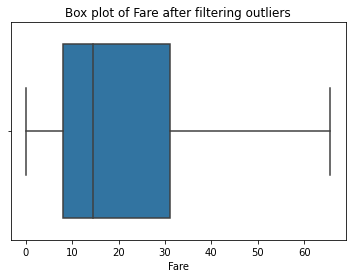

In [37]:
sns.boxplot(data['Fare'],data=data)
plt.title('Box plot of Fare after filtering outliers');

In [52]:
print('skewness value of Age: ',data['Age'].skew())

skewness value of Age:  0.38910778230082704


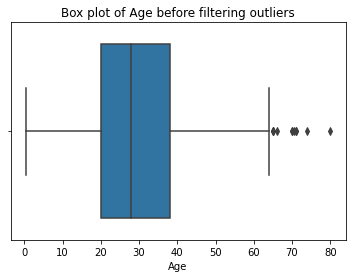

In [53]:
sns.boxplot(data['Age'],data=data)
plt.title('Box plot of Age before filtering outliers');

In [54]:
Q1=data['Age'].quantile(0.25)
Q3=data['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

17.875

In [55]:
data['Age'].median()

28.0

In [56]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [57]:
print(low_lim)
print(up_lim)

-6.6875
64.8125


In [58]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or (x<low_lim)):
       outlier.append(x)

In [59]:
outlier

[66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]

In [60]:
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=data['Age'][(data['Age']>upper_whisker)|(data['Age']<lower_whisker)].index
data.drop(index,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


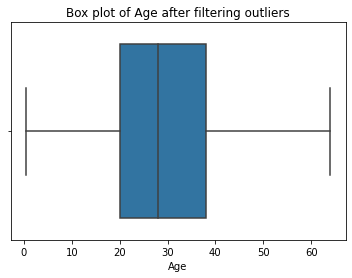

In [61]:
sns.boxplot(data['Age'],data=data)
plt.title('Box plot of Age after filtering outliers');

In [ ]:
#finding outliers in 'SibSp'column

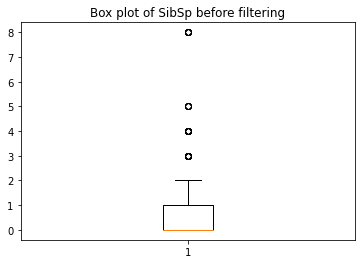

In [63]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp before filtering');

In [64]:
print('skewness value of SibSp: ',data['SibSp'].skew())


skewness value of SibSp:  3.6742635678636817


In [65]:
SibSp_mean = data['SibSp'].mean()
SibSp_std = data['SibSp'].std()
low= SibSp_mean -(3 * SibSp_mean)
high= SibSp_mean + (3 * SibSp_mean)
SibSp_outliers = data[(data['SibSp'] < low) | (data['SibSp'] > high)]
SibSp_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


In [66]:
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['SibSp']=np.where(data['SibSp']>upper_whisker,upper_whisker,np.where(data['SibSp']<lower_whisker,lower_whisker,data['SibSp']))


Text(0.5, 1.0, 'Boxplot of SibSp after filtering outliers')

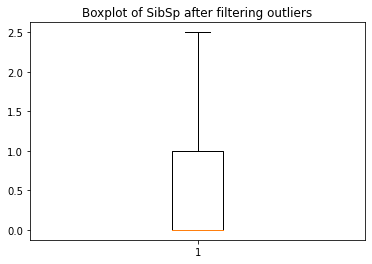

In [67]:
plt.boxplot(data['SibSp'])
plt.title("Boxplot of SibSp after filtering outliers")

# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [81]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
data=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\titanic_dataset.xlsx")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


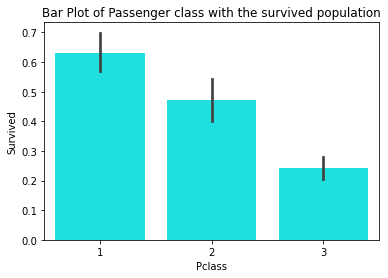

In [70]:
#Passenger class with the survived population
sns.barplot('Pclass', 'Survived', data=data, color="cyan")
plt.title('Bar Plot of Passenger class with the survived population')
plt.show()



C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


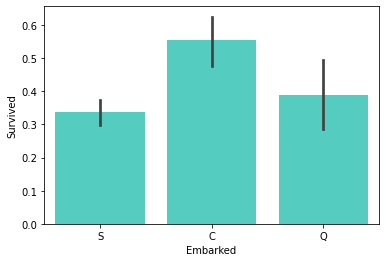

In [71]:
#Embarked column with the survived population
sns.barplot('Embarked', 'Survived', data=data, color="turquoise")
plt.show()



C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


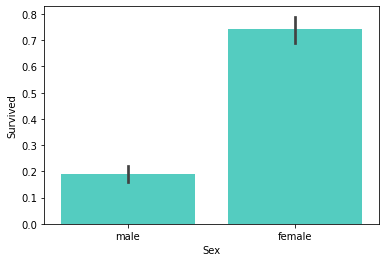

In [72]:
#Sex column with the survived population
sns.barplot('Sex', 'Survived', data=data, color="turquoise")
plt.show()


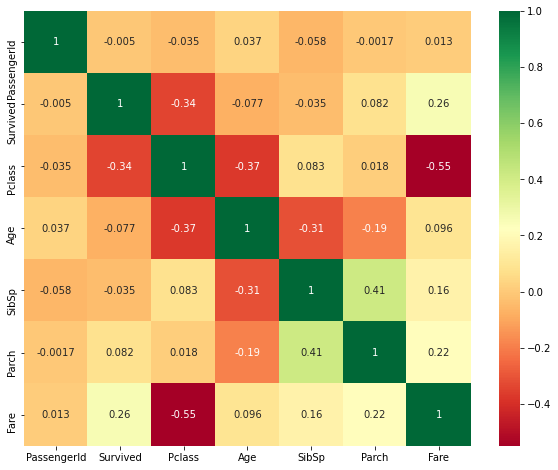

In [73]:
#correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#The features which seems irrelevant for data preprocessing  ie'Name','Ticket','Cabin','PassengerId','SibSp','Parch','Embarked' are dropped


In [79]:

data.drop(columns=['Name','Ticket','Cabin','PassengerId','SibSp','Parch'], inplace=True)

data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [82]:
data['Age']=le.fit_transform(data['Age'])
data['Fare']=le.fit_transform(data['Fare'])
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [83]:
data.dtypes

Survived    int64
Pclass      int64
Sex         int32
Age         int64
Fare        int64
Embarked    int32
dtype: object

In [84]:
data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,28,18,2
1,1,1,0,51,207,0
2,1,3,0,34,41,2
3,1,1,0,47,189,2
4,0,3,1,47,43,2


In [85]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [86]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,48.609428,105.355780,1.538721
std,0.486592,0.836071,0.477990,25.539308,70.082521,0.794231
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,28.000000,40.500000,1.000000
50%,0.000000,3.000000,1.000000,42.000000,94.000000,2.000000
75%,1.000000,3.000000,1.000000,69.000000,157.000000,2.000000
max,1.000000,3.000000,1.000000,88.000000,247.000000,3.000000


In [87]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [88]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m1=m.fit_transform(data)
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
data=min_max.fit_transform(data)

In [89]:
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5
0,0.0,1.0,1.0,0.318182,0.072874,0.666667
1,1.0,0.0,0.0,0.579545,0.838057,0.000000
2,1.0,1.0,0.0,0.386364,0.165992,0.666667
3,1.0,0.0,0.0,0.534091,0.765182,0.666667
4,0.0,1.0,1.0,0.534091,0.174089,0.666667


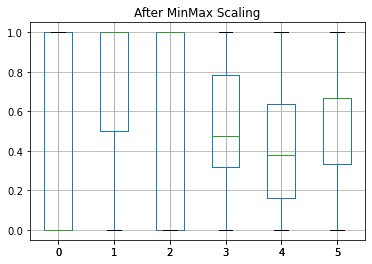

In [90]:
import matplotlib.pyplot as plt
plt.boxplot(data)
plt.title('After MinMax Scaling')
ax1 = data.boxplot(column=[0,1,2,3,4,5], figsize=(15,5), grid=True)

plt.show()

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)


In [93]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.7898305084745763

In [95]:
confusion_matrix(y_pred, y_test)


array([[154,  32],
       [ 30,  79]], dtype=int64)

In [ ]:
#This regression model predicts 79% percentage accuracy